In [1]:

import sounddevice as sd
import numpy as np
import matplotlib.pyplot as plt
from tkinter import *
from tkinter import ttk
import time
from copy import deepcopy
import mido


from synt.function import *
from synt.const import *
from synt.synt import *
from synt.osc import *

from synt.envolv import *
from synt.effects import *
from synt.instrumento import *
from synt.mixer import *

import os

In [2]:
'''MOSTAR ONDAS COPIANDOLAS PARA QUE NO SE ALTERE EL FRAME'''
from copy import copy
def showOsc(osc, time, chunks=False):
    _osc = copy(osc)
    signal = np.zeros(0)
    _chunks = int(time*(SRATE+CHUNK)/CHUNK)
    if chunks:
        _chunks = time
    for i in range(_chunks):
        signal = np.concatenate((signal, _osc.next()))
    plt.plot(signal)

In [3]:
'''REPRODUCTOR'''
input = None

def callback(outdata, frames, time, status):
    global input
    # print('entro')
    if input is not None:
        bloque = input.next()
        # convertimos formato (CHUNK,) a (CHUNK,1) para que adecuarlo a sounddevice
        outdata[:] = bloque.reshape(-1, 1)
    else:
        # si no hay datos, reproducimos silencio
        outdata[:] = np.zeros((CHUNK, 1))


# stream de salida con callBack
stream = sd.OutputStream(samplerate=SRATE, channels=2, callback=callback, blocksize=CHUNK)
stream.start()

In [4]:
os.system('xset r off')


0

In [5]:
raise Exception("Para de ejecutar!!") #(comentar para ejecutar todo de una)

Exception: Para de ejecutar!!

In [6]:
root = Tk()
tk = LabelFrame(root, text="Prueba", bg="#808090")

text = Text(tk,height=4,width=40)
text.pack(side=BOTTOM)

tk.pack(side=LEFT)

slider=Scale(tk, from_=10, to=100, resolution=1., orient=HORIZONTAL, label="silder", length=100)
slider.set(55)
slider.pack()

root.mainloop()


ALSA lib pcm.c:8772:(snd_pcm_recover) underrun occurred


In [6]:

root = Tk()
tk = LabelFrame(root, text="Prueba", bg="#808090")

# c = C(440, nombre="Const", tk=tk, show=True)
# c.doShow()
amp = Sine(C(30, show=True), 
           min=C(0, show=True), 
           max=C(1, show=True), 
           
           show=True)

phase=Sine(C(880, show=True), 
           max=C(1, show=True),
           min=C(0, show=True),
           show=True 
           ) 

s = Sine(
    C(440, show=True), 
    amp=amp,
    phase=phase,
    nombre="Seno", 
    show=True)
# s.doShow(tk)

synt = Synt(freq=C(550), onda=s, amp=C(1), show=True, nombre="Synt")

synt.doShow(tk)
tk.pack(side=LEFT)
# root.pack(side=TOP)
input = synt
root.mainloop()
input = None


In [8]:

root = Tk()
tk = LabelFrame(root, text="Prueba", bg="#808090")

# c = C(440, nombre="Const", tk=tk, show=True)
# c.doShow()
amp = Sine(C(30, show=True), 
           min=C(0), 
           max=C(1, show=True), 
           show=True)

phase=Sine(C(880, show=True), 
           max=C(1, show=True),
           min=C(0, show=True),
           show=True 
           ) 

s = Sine(
    C(1), 
    amp=amp,
    phase=phase,
    # nombre="Seno", 
    show=True
    )

s1 = Sine(
    C(440), 
    amp=deepcopy(amp),
    phase=deepcopy(phase),
    # nombre="Seno", 
    show=True
    )

s2 = Sine(
    C(440), 
    # amp=amp,
    phase=deepcopy(phase),
    # nombre="Seno", 
    show=True
    )
# s.doShow(tk)

tk.pack(side=LEFT)

a = C(1, show=True, nombre="general")
# a.doShow(tk)

# synt = Synt(C(1), s, amp=a, show=True, nombre="Synt")
synt = HarmSynt(C(1), [C(1), C(1 + 2.1/12), C(1 + 4.2/12)], [s, s1, s2], show=True)
env = EnvInstrumento(.2, .1, .7, 1, show=True)

inst = Instrumento(synt, env) # cutre
inst.doShow(tk)
# root.pack(side=TOP)
input = inst
# input=Echo(inst, 0.5, 0.2)
root.mainloop()
input = None


1.0
noteOn 48
523.2511306011972
noteOn 52
659.2551138257398
noteOff 52
off
noteOn 52
659.2551138257398
noteOff 52
off
noteOn 52
659.2551138257398
noteOff 52
off
noteOn 52
659.2551138257398
noteOff 52
noteOn 52
659.2551138257398
noteOff 52
noteOn 52
659.2551138257398
noteOff 52
noteOn 55
783.9908719634985
noteOff 55
off
noteOn 55
783.9908719634985
noteOff 55
noteOn 52
659.2551138257398
noteOff 52
off
noteOn 59
987.7666025122483
off
noteOff 48
noteOff 59
off
off


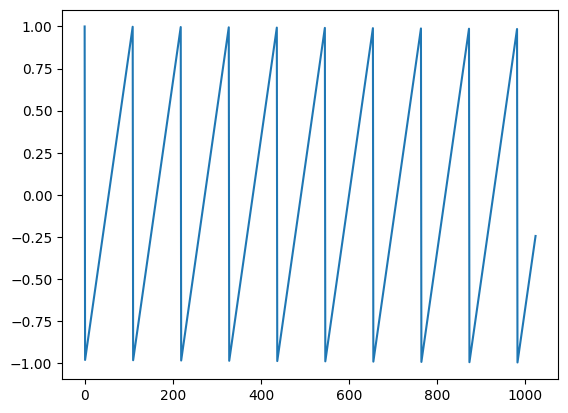

In [7]:

freq = C(440)
# s1 = Rep(freq, XP(valor=freq, pow=C(4)) * C(2) - C(1))
# s2 = Rep(freq, XP(valor=freq, pow=C(1/4)) * C(2) - C(1))
# s2 = Rep(C(440), XP(valor=C(440), pow=C(2)) * C(2) - C(1), phase=Sine(C(440)))
s3 = Sawtooth(freq, phase=C(np.pi/2))
# showOsc(s1, 1, True)
# showOsc(s2, 1, True)
showOsc(s3, 1, True)
input = s3

In [3]:
input = None